# Machine Learning Group Project - Home Credit (Group 08)
.
<center>Nova SBE, 2022</center>
<center>Professor Qiwei Han</center>
.
<center>Authors:</center>
<center>Felipe Botelho, 48740</center>
<center>Pedro Santos, 51323</center>
<center>Mª Carlota Santos, 48982</center>
<center>Wander Souza, 49734</center>
<center>Marcos Roche, 50455</center>

## Business Problem
As we all know, a home is the largest investment most people will ever make, and a mortgage is the best solution for those who cannot afford it or for tax-smart individuals who recognize the tax benefits they can use to invest their money wisely. 

After comprehending the significance of home loans, we must also recognize that they pose a significant risk to banks and economies. Let us recall that the 2008 financial crisis, also known as the Global Financial Crisis (GFC), was a severe global economic crisis that struck in the early twenty-first century. It was the worst economic downturn since the Great Depression (1929). This was caused because in 2006, for the first time in decades, housing prices began to fall. Realtors cheered at first. They believed that the overheated real estate market would cool down to a level that was more sustainable. They failed to account for a number of factors, including the fact that a large number of homeowners with bad credit were approved for mortgage loans, some of which were for 100% or more of the home's value. As we can see, a proper risk assessment for mortgage approval is critical for a bank and our economies. 

Through this notebook we hope to provide an optimal risk predictive solution to a major challenge that banks face in approving home loans to the right clients. We're attempting to create a model that optimizes a bank's loan approval process in order to provide a positive client experience while not overlooking the importance of proper risk assessment. 

## Do we need Machine Learning? 


A series of complex rules must be evaluated in order to assess the risk of a specific home loan. If banks analyze each loan application manually, they will not only waste a lot of time, but they will also have a much higher chance of failing in their estimation. This is where machine learning comes in. They can use the available database and data science skills to automate this task by creating a machine-learning model that predicts the risk of each loan application. 

But first, we wanted to avoid using machine learning in order to save company resources by implementing simple solutions and evaluating whether they were adequate. 

### Can we formulate our problem? 

We want to be able to predict the risk of assigning a home loan to our potential clients based on their age, years employed, ratings, balance, and other factors. The risk associated with home loans stems from the fact that we have no way of knowing whether or not the borrower will be able to make the payments. As a result, the loan's success is contingent on our receiving our funds. The loan will be approved if the output equals "Current." The loan will not be approved if the output is "Late" or "Default." 

### Do we have sufficient and correct data? 

As we all know, the Bank has ample data to work with in order to conduct various analyses. 
We also know that the data is labeled based on the characteristics of the clients. 
As a result, we can move on to our supervised learning task. 

### Does our problem have a regular pattern? 

To ensure the machine learning model's success, we must ensure that we can find patterns in our data, as the model will draw knowledge from those patterns and apply those same patterns to predict outputs in untrained data. 

We can find correlation patterns within our dataset simply by running a simple correlation function, as we did with Exploratory Data Analysis, and it also allows us to delve deeper into the reasons for the correlation. 

When we looked at the data before, we found that the loans that aren't being paid back account for only 8.1 percent of the total (24825). Despite the "low percentage," this represents a significant opportunity for the bank to develop strategies for dealing with the situation. 

As we've seen, there's a strong link between younger customers and unpaid loans. 

### Can we find meaningful representations of the data? 

Each loan status can be grouped together based on its feature values. Each loan is represented by a vector of feature values. 

### How do we define success? 

The next step is to evaluate the model. We can use performance metrics like "Accuracy," "Precision," "Recall," and so on because this is a classification model. If we select "Accuracy," we will learn the percentage of correctly predicted labels. We must consider whether we are dealing with an unbalanced dataset. If 1% of the loans are "Default," 2% are "Late," and the rest are "Current," we have a data skew problem. 

#### All imports used

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%pip install -U imbalanced-learn
%pip install xgboost
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV 
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---
## A Brief Introduction to our Data

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.
The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.
Thus, our Goal with this Machine Learning project is to evaluate what is the best solution to evaluate which clients will be rejected for loans. 

All the data used on the follwing project is stored in 8 different dataframes:

    1.  application_test_df : main table,  test sample: Infos about loans and loan applicants
    
    2.  application_train_df: main table,  train sample: Infos about loans and loan applicants
    
    3.  bureau_df: Application data from previous loans that client got from other institutions
    
    4.  bureau_balance_df: Monthly balance of credits in credit bureau
    
    5.  credit_card_balance_df: Monthly balance of client's previous credit card loans in Home Credit;
    
    6.  installments_payments_df: past payments data for each installments of previous credits in Home Credit related to loans in our sample;
    
    7.  POS_CASH_balance_df: Monthly balance of clients previous loans in Home Credit
    
    8.  previous_application_df: Application Data of client's previous loans in Home Credit

In [2]:
application_test_df = pd.read_csv('Datasets/application_test.csv')
application_train_df = pd.read_csv('Datasets/application_train.csv')
bureau_df = pd.read_csv('Datasets/bureau.csv')
bureau_balance_df = pd.read_csv('Datasets/bureau_balance.csv')
credit_card_balance_df = pd.read_csv('Datasets/credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
installments_payments_df = pd.read_csv('Datasets/installments_payments.csv')
POS_CASH_balance_df = pd.read_csv('Datasets/POS_CASH_balance.csv')
previous_application_df = pd.read_csv('Datasets/previous_application.csv')

## Datasets analisys

In [3]:
#Column descriptions from tge column descriptions dataset

HomeCredit_columns_description[(HomeCredit_columns_description['Row'] == 'SK_ID_CURR') |
                               (HomeCredit_columns_description['Row'] == 'SK_ID_PREV') | 
                               (HomeCredit_columns_description['Row'] == 'SK_BUREAU_ID')] 

,Table,Row,Description,Special
1,application.csv,SK_ID_CURR,ID of loan in our sample,NaN
125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed


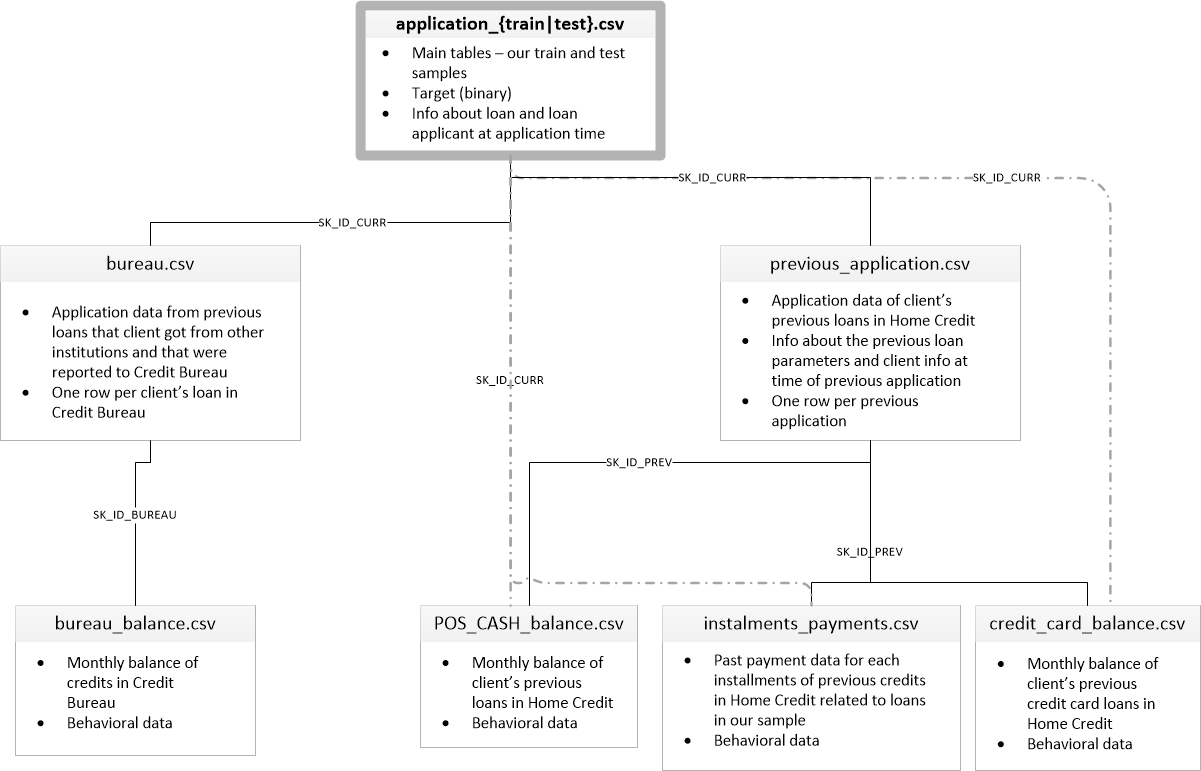

In [4]:
from IPython.display import display, Image
display(Image(filename='Data.png'))

## Exploratory Data Analysis

In this exploratory analysis we were able to obtain some early insights from our various types of clients and that will be further reiview in this section.

Since the original dataset can be clasiffied as "Extensive" our data science team decided to use best practices and work with a train dataset (which is a simplified dataset from the original). According to best practices for machine learning, it is encouraged to do so if the train dataset has enough features and covers all important characteristics. In this case, our team can ensure that the train dataset contains enough features to identify, categorize, and comprehend our clients.

Keep in mind that "TARGET" is our binary dependent variable (for loan classification) where **0 means "Repaid Loan"** and **1 means "Non repaid Loan"** .

In [5]:
train_df = application_train_df.copy()
train_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df = application_train_df.copy()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


After some experiments on the data, our group have spoted two columns with very important data that were not being presented the most efficient way: 
- DAYS_EMPLOYED: All collumns with error return a default value of 365243. We are thus replacing all the rows with this value by NaN values, anda create another collumn called "YEARS_EMPLOYED" that corresponds to the DAYS_EMPLOYED (already corrected), multiplied by -1 and devided by 365.
- DAYS_BIRTH: The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. We are going to create a new column called "CLIENT_AGE" which corresponds to the positive number of DAYS_BIRTH, devided by 365.

In [7]:
train_df['CLIENT_AGE'] = train_df['DAYS_BIRTH'] / -365

train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365243

train_df.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,0.001744
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,0.003253
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.000616
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,0.008320
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,0.008318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25.553425,0.000646
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56.917808,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41.002740,0.021687
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32.769863,0.013104


In [8]:
train_df.shape

(307511, 124)

### It is critical to comprehend our target variable and how it is distributed within our dataset. As illustrated in the following graph:

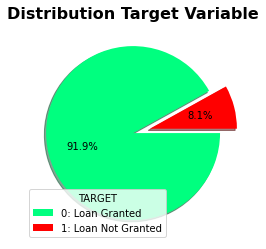

In [9]:
#Examine the distribution of the target Variables
# 0 means the loan was grated while 1 means the loan not granted
# Since the trainf_df has more records, we will use this one for eda purposes

values = train_df.TARGET.value_counts().values
colors = ['springgreen', 'red']
labels = ['0: Loan Granted', '1: Loan Not Granted']
explode = (0,0.2)
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.1f%%')
plt.title('Distribution Target Variable', color = 'black', fontweight = 'bold', fontsize = '16')
plt.legend(labels, loc=3, title='TARGET')
plt.show()

*Explanation of results*

- As we can see, there are far more loans that are repaid than those that are not. In data science this is referred to as an "imbalanced dataset"  when the diference between "true positives" and "true negatives" is very large. As a result, this could be a problem because when the records of one class outnumber those of another, our classifier may become biased toward the prediction.

##  So an imbalanced dataset is a problem, let's dig deeper and look for features that are correlated with our target variable.

In [10]:
train_df_correlations = train_df.corr()['TARGET'].sort_values(ascending= True)
print('Best Correlations with target variable are:\n', train_df_correlations.tail(7))
print('\nWorst Correlations with target variable are:\n', train_df_correlations.head(7))

Best Correlations with target variable are:
 DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Worst Correlations with target variable are:
 EXT_SOURCE_3     -0.178919
EXT_SOURCE_2     -0.160472
EXT_SOURCE_1     -0.155317
CLIENT_AGE       -0.078239
YEARS_EMPLOYED   -0.074958
FLOORSMAX_AVG    -0.044003
FLOORSMAX_MEDI   -0.043768
Name: TARGET, dtype: float64


**Explaining Results**

- To understand these results, keep in mind that a strong correlation coefficient value is between ± 0.50 and ± 1, a medium correlation is between ± 0.30 and ± 0.49, and a small correlation is less than ± 0.29. And, as we can see from the preceding examples, none of the the features have a strong or modarate correlation with our target variable.

## Despite having a weak correlation, age is the feature with the strongest correlation, so let's look into it.

Text(0.5, 1.0, 'Age Distribution')

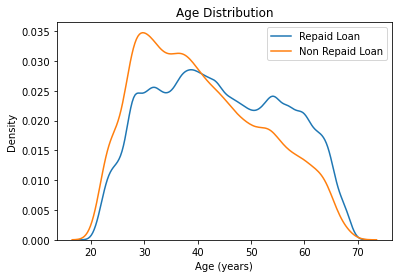

In [11]:
sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, 'CLIENT_AGE'] , label = 'Repaid Loan')
sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, 'CLIENT_AGE'] , label = 'Non Repaid Loan')
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution')

**Explaining results**

It is clear from this graph that there is a high association between age and repayments. In this situation, the older the clients are, the less likely they are to miss payments.

This might have something to do with the number of obligations (like children, school loans, car loans, etc.)

This is another key point to consider in terms of innovation management when developing products or services tailored to older clients with a good payment history.

## Although finding a meaningful correlation is a good first step, there are always more client characteristics to consider, as the following:

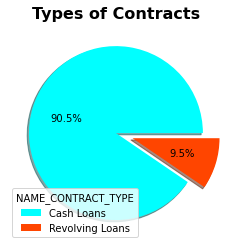

In [12]:
values = train_df.NAME_CONTRACT_TYPE.value_counts().values
colors = ['cyan', 'orangered']
labels = ['Cash Loans', 'Revolving Loans']
explode = (0,0.2)
plt.pie(values, colors=colors, explode=explode, counterclock=True, shadow=True, autopct='%1.1f%%')
plt.title('Types of Contracts', color = 'black', fontweight = 'bold', fontsize = '16')
plt.legend(labels, loc=3, title='NAME_CONTRACT_TYPE')
plt.show()

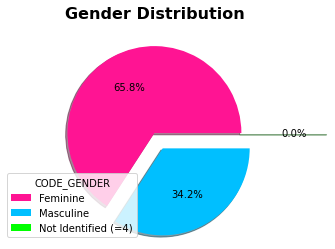

In [13]:
values = train_df.CODE_GENDER.value_counts().values
colors = ['deeppink', 'deepskyblue', 'lime']
labels = ['Feminine', 'Masculine', 'Not Identified (=4)']
explode = (0, 0.2, 1)
plt.pie(values, colors=colors, explode=explode, counterclock=True, shadow=True, autopct='%1.1f%%')
plt.title('Gender Distribution', color = 'black', fontweight = 'bold', fontsize = '16')
plt.legend(labels, loc=3, title='CODE_GENDER', bbox_to_anchor=(-0.2, 0))
plt.show()

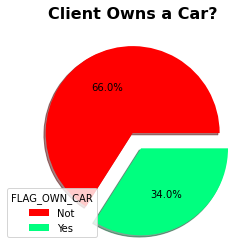

In [14]:
values = train_df.FLAG_OWN_CAR.value_counts().values
colors = ['red', 'springgreen']
labels = ['Not', 'Yes']
explode = (0, 0.2)
plt.pie(values, colors=colors, explode=explode, counterclock=True, shadow=True, autopct='%1.1f%%')
plt.title('Client Owns a Car?', color = 'black', fontweight = 'bold', fontsize = '16')
plt.legend(labels, loc=3, title='FLAG_OWN_CAR', bbox_to_anchor=(-0.1, 0))
plt.show()

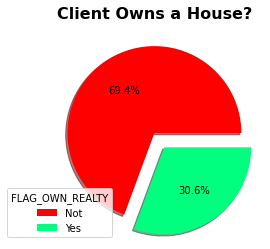

In [15]:
values = train_df.FLAG_OWN_REALTY.value_counts().values
colors = ['red', 'springgreen']
labels = ['Not', 'Yes']
explode = (0, 0.2)
plt.pie(values, colors=colors, explode=explode, counterclock=True, shadow=True, autopct='%1.1f%%')
plt.title('Client Owns a House?', color = 'black', fontweight = 'bold', fontsize = '16')
plt.legend(labels, loc=3, title='FLAG_OWN_REALTY', bbox_to_anchor=(-0.2, 0))
plt.show()

In [16]:
def bar_plot(temp):
    df = pd.DataFrame({'Status': temp.index,
                       'Number': temp.values
                      })
    plt.figure(figsize = (13,10))
    sns.set_color_codes("pastel")
    sns.barplot(x = 'Status', y="Number", data=df)
    locs, labels = plt.xticks()

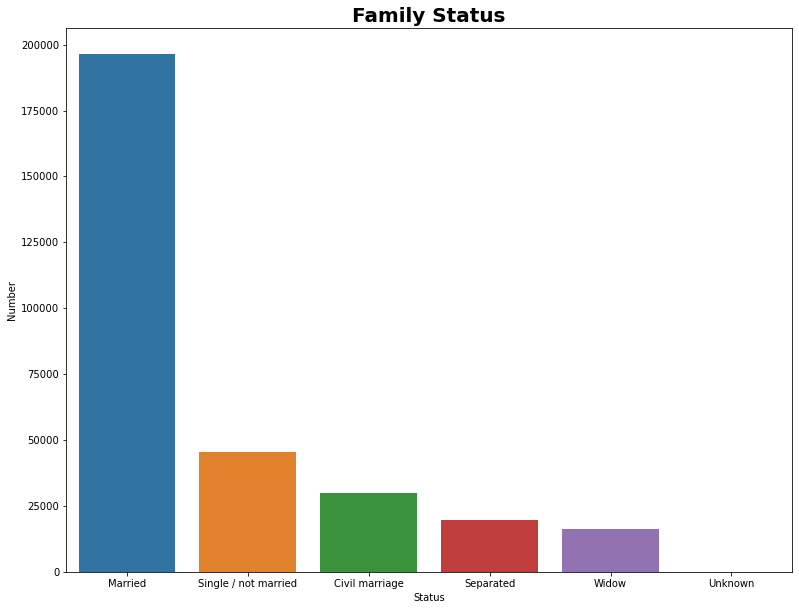

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


In [17]:
temp = train_df['NAME_FAMILY_STATUS'].value_counts()
bar_plot(temp)
plt.title('Family Status', color = 'black', fontweight = 'bold', fontsize = '20')
plt.show()
print(temp)

**Findings:**   

We can see interesting client characteristics in these graphs, such as, our main product **(90.5 %) is cash loans**, more than half of our clients are **women (65.8 %)**, and the majority of our clients do not own a car or a house but are married. And that **people with lower educational levels tend to apply for more home credit loans**, we can conclude that people with lower educational levels earn less money than clients with higher educational levels.

With these valuable insights, we can gain a better understanding of the types of clients we already have and adjust our portfolio and innovation management strategies to improve our products and services.

## What about the client's loans amount distribution?

Text(0.5, 1.0, 'Distribution Loan Amounts')

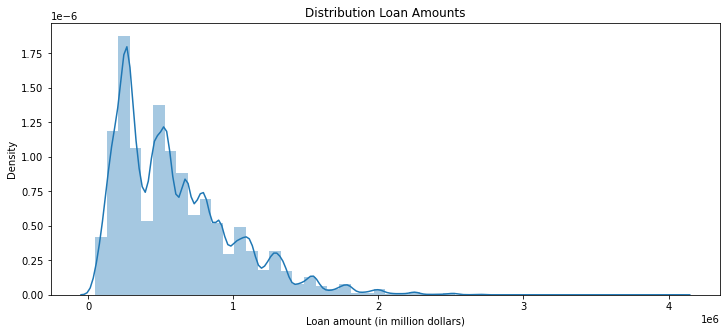

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(train_df["AMT_CREDIT"])
plt.xlabel('Loan amount (in million dollars)')
plt.ylabel('Density')
plt.title('Distribution Loan Amounts')

**To finish the exploratory analysis section**,it is important to reflect on some key conclusions Loan amounts distribution:
- The vast majority of loan applications have a loan amount of less than $ 500,0000
- There is a small but significant difference between loans of half a million dollars and those of one million dollars (second relative max point on the graph)
- Despite the high density of loans under a million dollars, there are still outliers that we would recommend studying to understand the type of clients and their characteristics in order to determine if there is a market opportunity.

## Data Curation

#### To create a great data analysis, we must first go through a data curation process to determine which features have too many missing values.

In [19]:
#Function that shows the percentage of missiong values for each column

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

In [20]:
missing = missing_data(train_df)
missing

,Total,Percent
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
AMT_INCOME_TOTAL,0,0.000000
CNT_CHILDREN,0,0.000000
FLAG_OWN_REALTY,0,0.000000
ORGANIZATION_TYPE,0,0.000000


**Explaining results**

Missing data are observations that should have been recorded but were not. Values can be missing for a variety of reasons, and most of the time we don't know why people didn't answer certain questions.

In order to have a successfull analysis we decided to only select the features based on a threshold for missing values of 5%. So we will work with columns with less than 5% of missing values are going to be used.

In [21]:
train_df = train_df[missing[missing["Percent"]<5].index]

for i in train_df.select_dtypes(include = 'float64').columns:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)
    
for i in train_df.select_dtypes(include = 'int64').columns:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

objects = train_df.select_dtypes(include=['object'])
objects.head(5)

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,Unaccompanied,N,Cash loans,WEDNESDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Business Entity Type 3
1,Family,N,Cash loans,MONDAY,F,House / apartment,Married,Higher education,State servant,N,School
2,Unaccompanied,Y,Revolving loans,MONDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Government
3,Unaccompanied,N,Cash loans,WEDNESDAY,F,House / apartment,Civil marriage,Secondary / secondary special,Working,Y,Business Entity Type 3
4,Unaccompanied,N,Cash loans,THURSDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Religion


**The following step is the encoding process**

For the sake of filling NaN values in the data set, our data science team decided to use the mode () function to fill in NaN values in the data set. This function returns the mode(s) of each element along the specified axis. The mode of a set of values is the value that occurs the most frequently, and it can have multiple values.

Also, they decided to transform the categorical features to numerical data type instead of object data type in order to be able to fit and train our model. 

In [22]:
for i in objects.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    objects[i].fillna(objects[i].mode()[0], inplace=True)
    objects[i]= enc.fit_transform(objects[[i]])

objects = objects.astype('int64')
train_df = train_df.select_dtypes(exclude=['object'])

In [23]:
# Shift column 'TARGET' to first position
first_column = train_df.pop('TARGET')
train_df.insert(0, 'TARGET', first_column)

In [24]:
train_df = train_df.join(objects)
train_df.head(5)

,TARGET,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,1,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,6,1,1,3,4,7,1,5
1,0,0.0,1.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,1,0,1,1,1,4,0,39
2,0,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,1,1,1,1,1,3,4,7,1,11
3,0,0.0,2.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,6,0,1,0,4,7,1,5
4,0,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,4,1,1,3,4,7,1,37


In [25]:
X = train_df.iloc[:, 1:122]
y = train_df['TARGET']

print(X.shape)
print(y.shape)

(307511, 64)
(307511,)


#### DATA CURATION is done now

At the moment we have our most important features treated, all missing values were carefully analyzed  

We now have a final dataset ready to go! 
Explain the shape
Enforce what was done on curation

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   DEF_30_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 2   OBS_30_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 3   OBS_60_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 5   EXT_SOURCE_2                 307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   CNT_FAM_MEMBERS              307511 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 10  FLAG_DOCUMENT_6              307511 non-null  int64  
 11  CLIENT_AGE                   307511 non-null  float64
 12  FLAG_DOCUMENT_21             307511 non-null  int64  
 13 

## Pipelines for the rescue!

When using machine learning techniques, a series of tasks such as preprocessing, feature extraction, model fitting, and validation are typically performed. A pipeline is a series of automated steps that can contain any number of jobs.

That is why we are employing pipelines: they'll make finding the best solution to our problem easier and faster.
In the following section of our problem solution, we'll use preprocessing pipelines to select the features, a basic imputer (applying a median value) to address NaN values, and a standardization phase to ensure that the data is aligned.
We will also build Estimator pipelines for various models and assess their performance.


In [27]:
train_df.fillna(0, inplace=True)
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#### Creating Float and Integer Pipelines

Because there are different approaches to both data types, it is now time to create preprocessing pipelines for float and integer features.

Finally, the goal is to have a "typesPipeline" pipeline for both data types' preprocessing tasks.


In [29]:
floatVariables = list(X_train.loc[:, X_train.dtypes == 'float64'].iloc[:, 1:].columns)
integerVariables = list(X_train.loc[:, X_train.dtypes == 'int64'].iloc[:, 1:].columns)

In [30]:
pipelineFloats = Pipeline([
    ('selector', DataFrameSelector(floatVariables)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

pipelineIntegers = Pipeline([
    ('selector', DataFrameSelector(integerVariables)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [31]:
typesPipeline = FeatureUnion(transformer_list=[
    ("pipelineFloats", pipelineFloats),
    ("pipelineIntegers", pipelineIntegers)
])

## Feature Engeneering

#### It is finally time to choose the best features for our machine learning models. We're almost done with the problem that was assigned to us.

We will use a Random Forest model to ensure that we only use relevant and critical features. We believe that Random Forest is the best model for this task because we are dealing with a classification problem (repaid vs non-repaid loans) and they provide good predictive performance, low overfitting, and easy interpretability! We will also train the random forest model on our data and examine how it performs.

In [32]:
#undersample = RandomUnderSampler()
oversample = SMOTE()

In [33]:
#X,y=undersample.fit_resample(X,y)
X,y=oversample.fit_resample(X,y)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
feature_selection = SelectFromModel(model)
sel = feature_selection.fit(X_train, y_train)
selected_features= X_train.columns[(sel.get_support())]
print(len(selected_features))
print(selected_features)

24
Index(['DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'CLIENT_AGE', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'FLAG_EMP_PHONE',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'SK_ID_CURR', 'FLAG_OWN_CAR', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_INCOME_TYPE', 'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE'],
      dtype='object')


In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_df[selected_features[:].values], sel.estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values( 'Gini-importance',ascending=False)

,Gini-importance
AMT_GOODS_PRICE,8.426209e-02
DAYS_LAST_PHONE_CHANGE,8.044555e-02
OBS_30_CNT_SOCIAL_CIRCLE,7.955976e-02
OBS_60_CNT_SOCIAL_CIRCLE,7.317072e-02
CLIENT_AGE,3.491119e-02
FLAG_PHONE,2.844471e-02
DEF_30_CNT_SOCIAL_CIRCLE,2.316007e-02
CNT_FAM_MEMBERS,2.079382e-02
AMT_ANNUITY,1.844516e-02
EXT_SOURCE_2,1.536414e-02


**Explaining feature importance and the big difference between the most important ones and the other**

One feature appears to be far more important than the others: DAYS_LAST_PHONE_CHANGE, which represents "How many days before application did client change phone". This is very interesting. On the following cell we have our final and complete pipeline.

In [37]:
fullPipeline = Pipeline([
    ("typesPipeline", typesPipeline),
    ("selected_features", feature_selection)
])

## Last step: applying machine learning models to solve our problem

### Random Forest 

In the industry, random forest is very popular for classification problems. Because of its simplicity, it is a fast and flexible algorithm that is resistant to overfitting, has good performance, and has a high classification accuracy in general.
Although the quality of the data has a significant impact on the performance of any model, in our case, the imbalanced dataset was a significant disadvantage, leading us to use over and under-sampling techniques.
Random oversampling involves randomly duplicating minority class examples, whereas random undersampling involves randomly deleting majority class examples. Furthermore, we tested both solutions backstage, and the model with oversampled data outperformed the model with undersampled training data. When we want to ensure the presence of our best solution, the following model employs an oversample.




In [38]:
randomForestModel = model

In [39]:
pipelineRandomForest = Pipeline([
    ('fullPipeline', typesPipeline),
    ('randomForestModel', randomForestModel)
])

In [40]:
pipelineRandomForest.fit(X_train, y_train)
a = 1 #To avoind extensive print

In [41]:
pipelineRandomForest.score(X_test,y_test)

0.9470439973468937

**94,6% score?? Great !!**

It looks like the model has potential!

Lets analyze with other metrics...

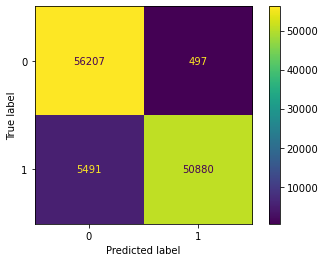

In [42]:
y_RF_predicted = pipelineRandomForest.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_RF_predicted)
ConfusionMatrixDisplay(cf_matrix).plot()

In [43]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')

Precision score: 0.99
Recall score: 0.903
Accuracy score: 0.947
F1 score: 0.944


**Explaining results**

Excellent! Even with fewer data points, our model performs admirably. As evidenced by the confusion matrix, our predictions are extremely accurate. Furthermore, we have outstanding performance metrics.

On paper, our model performs admirably, and the figures speak for themselves. What else do we bring to the table besides accurate predictions?

During the development of these projects, we were confronted with a massive dataset containing an astronomical number of features; data collection typically represents a cost to the organization, and as we can see, most were ineffective in addressing this problem.


### Logistic Regression

Cool! Random forest is working but what about other possible approaches for the problem?

Logistic regression has also a lot of potential for classification problems!

Lets see how it goes...

In [45]:
# Simple Logistic Regression Model just to see if this type of approach works

# Instantiating the model
logisticRegressionModel = LogisticRegression()

In [46]:
# Inserting model in pipeline and fitting the data. Let's fit the logistic regression directly
logisticRegressionPipeline = Pipeline([
                    ('preprocessor', typesPipeline), 
                    ('logisticRegression', logisticRegressionModel)]
)


**Hyperparameter optimization** is the art of finding the best parameters for a logistic regression! Grid Search allows us to try several different options for parameter combinations and, at the end, finds the best ones!

In [47]:
# We used GridSearchCV to automate the tuning of hyperparameters

# Parameters for Grid Search
param_grid = {'logisticRegression__C': np.arange(0, 10, 1)} #, "logisticRegression__penalty":['none', 'l1', 'l2'], "logisticRegression__solver":['newton-cg', 'liblinear', 'saga']

# Grid Search
logisticRegressionPipelineCV = GridSearchCV(logisticRegressionPipeline, param_grid=param_grid, cv=5)

We ran the full Grid Search once to find out the perfect parameters, and the results were G = 8, Penalty = 'None' and Solver = 'Saga'. These were the parameters used. However, we had to re-run the model, and it didn't work to re-run Grid Search. So we let it run only G and commented out the rest!

In [48]:
logisticRegressionPipelineCV.fit(X_train,y_train)
a = 1 #To avoid extensive print

In [49]:
param_c = logisticRegressionPipelineCV.best_params_['logisticRegression__C']

#param_penalty = logisticRegressionPipelineCV.best_params_['logisticRegression__penalty']
#param_solver = logisticRegressionPipelineCV.best_params_['logisticRegression__solver']

print("Tuned hpyerparameters: (best parameters)", logisticRegressionPipelineCV.best_params_)
print("Accuracy:", logisticRegressionPipelineCV.best_score_)

Tuned hpyerparameters: (best parameters) {'logisticRegression__C': 8}
Accuracy: 0.8058952349869524


Precision score: 0.551
Recall score: 0.589
Accuracy score: 0.556
F1 score: 0.569
AUC score: 0.556


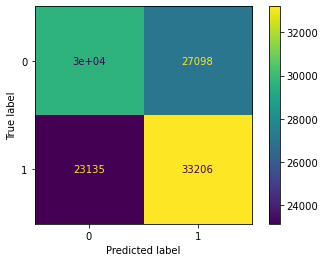

In [50]:
log_reg_final = LogisticRegression(C = param_c, penalty = 'none', solver = 'saga', class_weight = 'balanced')

log_reg_final.fit(X_train,y_train)
y_test_predicted = log_reg_final.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')


confusion_matrix = confusion_matrix(y_test,y_test_predicted, labels=[0, 1])

ConfusionMatrixDisplay(confusion_matrix).plot()

**Explaining Results**

It makes perfect sense that we tested a logistic regression model since we are interested in calculating the probability of a binary (yes/no) event occurring (the so called classification model). In our case, we are using a dummy dependent variable, where 0 corresponds to repaid loans and 1 corresponds to non repaid loans. The results are not as close to perfection as those verified with Random Forest. However, the model was able to predict the true labels better than the false labels, and that is halfway to a successful model! As we can see, in the upper left corner we have the true positives (the loans that were actually repaid - 0 labeled and 0 predicted). In the lower right corner we have the true negatives (the loans that were actually no repaid - 1 labeled and 1 predicted). These are the most important quadrants, where we must have the upper values - and we do!
In the upper right corner we have the false negatives (we predicted the loans would be non repaid - 1 - when in fact they were repaid - 0) and in the lower left corner we have the false positives (we predicted the loans would be repaid - 0 - and, in fact, they were non repaid - 1). This last quadrant should also be the one where we have the lowest values - and it checks out! Good job!


Note that class_weight = 'balanced' which means we are not biasing our records with the class_weight parameter. We solved the problem of imbalancement on the feature engeneering stage with oversampling and random forest.

### XGBoost Model

Last but not least, lets try a XGBoost model to see how it behaves with our data.

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for classification problems like ours.
The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. 

Will this be a winning model?

In [44]:
XGBoost = xgb.XGBClassifier(random_state = 42, objective = 'binary:logistic', eval_metric = 'logloss')

In [45]:
# Creating a pipeline with XGBoost Classifier
XGBPipeline = Pipeline([
    ('fullPipeline', typesPipeline),
    ('XGBoost', XGBoost)
])

In [46]:
# Hyperparameter optimization
param_distributions = {'XGBoost__n_estimators': np.arange(50, 201, 10)}  #, 'XGBoost__max_depth': np.arange(0, 51, 5), 'XGBoost__learning_rate': np.arange(0.000, 0.3, 0.02)

XGBPipelineCVSearch = (
    RandomizedSearchCV(
        XGBPipeline, 
        param_distributions = param_distributions,
        n_iter = 12, cv = 5, 
        scoring = 'recall', 
        random_state = 42,
        n_jobs = 6)
)

In [47]:
XGBPipelineCVSearch.fit(X_train, y_train)
a = 1

In [55]:
XGBPipelineCVSearch.score(X_test,y_test)

0.9113728690284011

In [56]:
XGB_best_estimator_search = XGBPipelineCVSearch.best_estimator_

In [57]:
XGB_y_test_pred = XGB_best_estimator_search.predict(X_test)

In [58]:
XGB_precision_test = precision_score(y_test, XGB_y_test_pred)
XGB_recall_test = recall_score(y_test, XGB_y_test_pred)
XGB_f1_test = f1_score(y_test, XGB_y_test_pred)
XGB_accuracy_test = accuracy_score(y_test, XGB_y_test_pred)
XGB_roc_test = roc_auc_score(y_test, XGB_y_test_pred)

In [59]:
arr1 = np.array([XGB_y_test_pred, y_test])

In [60]:
print(f'Original Array:\n{arr1}')

arr1_transpose = arr1.transpose()

print(f'Transposed Array:\n{arr1_transpose}')

Original Array:
[[0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]]
Transposed Array:
[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [61]:
df = pd.DataFrame(arr1_transpose)
df

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
113070,0,1
113071,0,0
113072,0,0
113073,1,1


In [62]:
x = df[(df[0] == df[1])]
tp = len(x[x[0] == 0]) #True Positive
tn = len(x[x[0] == 1]) #True Negative 
x = df[(df[0] != df[1])] 
fp = len(x[x[0] == 0]) #False Positive
fn = len(x[x[0] == 1]) #False Negative


In [63]:
Matrix = [[tp,fn],[fp,tn]]
Matrix = np.asmatrix(Matrix)
Matrix

matrix([[56459,   245],
        [ 4996, 51375]])

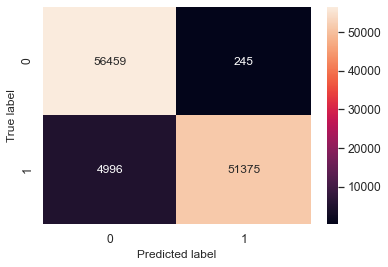

In [64]:
import seaborn as sn

df_cm = pd.DataFrame(Matrix, range(2), range(2))
#plt.figure(figsize=(10,7)) 
sn.set(font_scale=1.1) # for label size
confusion_matrix = sn.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 12}) # font size
confusion_matrix.set_ylabel('True label', fontsize=12)
confusion_matrix.set_xlabel('Predicted label', fontsize=12)

plt.show()

In [65]:
print(f'Precision score: {round(XGB_precision_test, 3)}')
print(f'Recall score: {round(XGB_recall_test, 3)}')
print(f'F1 score: {round(XGB_f1_test, 3)}')
print(f'Accuracy score: {round(XGB_accuracy_test, 3)}')
print(f'AUC score: {round(XGB_roc_test, 3)}')

Precision score: 0.995
Recall score: 0.911
F1 score: 0.951
Accuracy score: 0.954
AUC score: 0.954


**Explaining results**

This is not "a" winning model, this is THE winning model!
These are the best results we could expect in a model. The scores are very high and the model behaves very well as we can see in the confusion matrix (best false positive and false negative results we have ever seen).

***Note***: we tried to run sklearn's confusion matrix but the following error kept coming up: "
TypeError: 'numpy.ndarray' object is not callable". We tried to solve the error, but it wasn't possible at all. So, since this was our best model, we decided to create the confusion matrix ourselves, using seaborn's heatmaps.

## Conclusions

From the understanding that machine learning's primary goal is to discover patterns in consumer data and then make predictions based on these intricate patterns in an attempt to address business questions and solve business problems. Through this notebook, we hoped to provide an optimal risk predictive solution to a major challenge that banks face in approving home loans to the right clients taking into account the information, as stated at the outset. We attempted to create three different models that optimized the bank's loan approval process in order to provide a positive client experience while keeping proper risk assessment in mind.

In order to develop a good machine learning models we must first identify the best attributes that our "ideal" client must have, after reviewing the different attributes we have at our disposal, we identify the 3 most relevant attributes:
**Days last phone change** (days before application did client change phone), **Obs 30 CNT social circle** (number of observations of client's social surroundings with observable 30 days past due), **Amt goods price** (price of the goods for which the loan is given), and **Obs 60 CNT social circle** (number of observations of client's social surroundings with observable 60 days past due).
With these relevant attributes, we will be able to qualify our clients within our models and rate them to determine whether they are worthy of a loan or not.

After reviewing our 3 models we can see that the best performing model is the XGBoost with Oversampling and feature selection from Random Forest that gave us almost perfect scores this gives the company enough security that they will be giving the loans to the right clients reducing the risk of losing money, giving also the opportunity to focus efforts on improving the products and services provided by the company.

So we can say that the project was a success and could be use as a best practice implementation for the market to reduce risks on loan allocation process.